In [112]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

#### Target (5-HT1A) + Bioactivity data (IC50) from ChEMBL

In [113]:
target_query = new_client.target.search("5-HT1A")
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P08908', 'xref_name': None, 'xre...",Homo sapiens,Serotonin 1a (5-HT1a) receptor,20.00,False,CHEMBL214,"[{'accession': 'P08908', 'component_descriptio...",SINGLE PROTEIN,9606.00
1,"[{'xref_id': 'P19327', 'xref_name': None, 'xre...",Rattus norvegicus,Serotonin 1a (5-HT1a) receptor,20.00,False,CHEMBL273,"[{'accession': 'P19327', 'component_descriptio...",SINGLE PROTEIN,10116.00
2,"[{'xref_id': 'NBK23137', 'xref_name': '5-HT1A ...",Mus musculus,Serotonin 1a (5-HT1a) receptor,20.00,False,CHEMBL3737,"[{'accession': 'Q64264', 'component_descriptio...",SINGLE PROTEIN,10090.00
3,[],Homo sapiens,5-HT1A/5-HT1F,19.00,False,CHEMBL4523958,"[{'accession': 'P30939', 'component_descriptio...",SELECTIVITY GROUP,9606.00
4,[],Homo sapiens,Dopamine D2 receptor and serotonin 1a receptor,18.00,False,CHEMBL2111460,"[{'accession': 'P14416', 'component_descriptio...",SELECTIVITY GROUP,9606.00
...,...,...,...,...,...,...,...,...,...
2104,[],Homo sapiens,NEK kinase,1.00,False,CHEMBL4524130,"[{'accession': 'P51955', 'component_descriptio...",PROTEIN FAMILY,9606.00
2105,[],Homo sapiens,Nicotinic Acetylcholine Receptor,1.00,False,CHEMBL4524133,"[{'accession': 'P02708', 'component_descriptio...",PROTEIN COMPLEX GROUP,9606.00
2106,[],Homo sapiens,Neuronal acetylcholine receptor,1.00,False,CHEMBL4804182,"[{'accession': 'P17787', 'component_descriptio...",PROTEIN COMPLEX GROUP,9606.00
2107,[],Homo sapiens,26S proteasome,0.00,False,CHEMBL2364701,"[{'accession': 'Q99460', 'component_descriptio...",PROTEIN COMPLEX,9606.00


In [114]:
target_id = targets.target_chembl_id[0]
target_id

'CHEMBL214'

#### IC50
Half Maximum Inhibition Conentration

- A quantitative measurement of how much(molar concentration) an inhibitory substance(eg.drug) is needed to inhibit a biological compoonent/process by 50% in vitro

link: https://en.wikipedia.org/wiki/IC50

In [115]:
activity = new_client.activity
bioactivity = activity.filter(target_chembl_id = target_id).filter(standard_type__in = ["IC50","pIC50"])
df_ori = pd.DataFrame.from_dict(bioactivity)
df_ori.to_csv("original_5HT1A_IC50_pIC50.csv", index = False)
df_ori

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,73550,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.2
1,None,None,75760,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.6
2,None,None,75768,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.2
3,None,None,77927,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,6.3
4,None,None,79051,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,None,None,23353679,[],CHEMBL4880836,Serotonin (5-Hydroxytryptamine) 5-HT1A Eurofin...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,uM,UO_0000065,None,7.01
766,None,None,24647181,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5058721,HTR1A Eurofins SafetyScan (Receptor),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
767,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24710220,[],CHEMBL5109933,Inhibition of 5-HT1A receptor (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,nM,UO_0000065,None,1.2
768,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25045061,[],CHEMBL5245784,Displacement of [35S] GTPgammaS from human 5-HT1A,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,nM,UO_0000065,None,36.0


## Data Preprocessing

In [116]:
# Drop missing data
df_nna = df_ori[df_ori.standard_value.notna()]
df_nna = df_nna[df_nna.canonical_smiles.notna()]
df_nna = df_nna.reset_index(drop = True)

df_nna

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,73550,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.2
1,None,None,75760,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.6
2,None,None,75768,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.2
3,None,None,77927,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,6.3
4,None,None,79051,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,None,None,23353679,[],CHEMBL4880836,Serotonin (5-Hydroxytryptamine) 5-HT1A Eurofin...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,uM,UO_0000065,None,7.01
744,None,None,24647181,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5058721,HTR1A Eurofins SafetyScan (Receptor),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
745,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24710220,[],CHEMBL5109933,Inhibition of 5-HT1A receptor (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,nM,UO_0000065,None,1.2
746,"{'action_type': 'INHIBITOR', 'description': 'N...",None,25045061,[],CHEMBL5245784,Displacement of [35S] GTPgammaS from human 5-HT1A,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,nM,UO_0000065,None,36.0


In [117]:
# Drop duplicate compouds

df_clean = df_nna.drop_duplicates(["canonical_smiles"])
df_clean = df_clean.reset_index(drop = True)
df_clean

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,73550,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.2
1,None,None,75760,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.6
2,None,None,75768,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,7.2
3,None,None,77927,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,6.3
4,None,None,79051,[],CHEMBL616400,Binding activity against 5-hydroxytryptamine 1...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,pIC50,None,UO_0000065,None,6.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,"{'action_type': 'INHIBITOR', 'description': 'N...",None,23295776,[],CHEMBL4840631,Inhibition of 5-HT1a (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,nM,UO_0000065,None,0.14
659,None,None,23353679,[],CHEMBL4880836,Serotonin (5-Hydroxytryptamine) 5-HT1A Eurofin...,B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,uM,UO_0000065,None,7.01
660,None,None,24647181,"[{'comments': None, 'relation': '=', 'result_f...",CHEMBL5058721,HTR1A Eurofins SafetyScan (Receptor),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,uM,UO_0000065,None,10.0
661,"{'action_type': 'INHIBITOR', 'description': 'N...",None,24710220,[],CHEMBL5109933,Inhibition of 5-HT1A receptor (unknown origin),B,None,None,BAO_0000190,...,Homo sapiens,Serotonin 1a (5-HT1a) receptor,9606,None,None,IC50,nM,UO_0000065,None,1.2


#### Convert IC50 to pIC50

( the original dataframe contains both IC50/nM and pIC50/None )

To allow values to be more uniformly distributed

pIC50 = -log10(IC50) 

- IC50: smaller the concentration, higher the inhibition effect

- pIC50: larger the value, higher the inhibition effect


In [118]:
def convert_to_pIC50(row):
    if row["standard_type"] == "IC50":
        # Convert IC50 (nM) to pIC50
        return 9 - np.log10(float(row["standard_value"]))  # Assuming IC50 is in nM
    else:
        # Already pIC50, return as is
        return row["standard_value"]

In [119]:
df_clean["pIC50"] = df_clean.apply(convert_to_pIC50, axis=1)

# Select CID, Canonical SMILES and pIC50
selected_vars = ["molecule_chembl_id","canonical_smiles","pIC50"]
df_pic = df_clean[selected_vars]
df_pic

,molecule_chembl_id,canonical_smiles,pIC50
0,CHEMBL300209,CN(C)CCc1c[nH]c2ccc(Cc3nnn[nH]3)cc12,7.20
1,CHEMBL54265,CN(C)CCc1c[nH]c2ccc(-n3cncn3)cc12,7.60
2,CHEMBL53764,Cc1nccn1-c1ccc2[nH]cc(CCN(C)C)c2c1,7.20
3,CHEMBL299213,CCn1nnc(Cc2ccc3[nH]cc(CCN(C)C)c3c2)n1,6.30
4,CHEMBL53128,CN(C)CCc1c[nH]c2ccc(Cc3nnnn3C)cc12,6.70
...,...,...,...
658,CHEMBL4864918,N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc(-n5ccc6occc6c5...,9.85
659,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,5.15
660,CHEMBL5092058,Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...,5.00
661,CHEMBL304426,CCCN(CCC)C1CCc2ccc3[nH]cc(C=O)c3c2C1,8.92


#### Label compounds by bioactivity values:
IC50

-    < 1000 nM    --active

-    \> 10,000 nm --inactive

-    between     --intermediate 

(choice of threshold: reference https://www.nature.com/articles/s41598-024-55628-y)

In [120]:
# Label compounds
bioactivity = []
active, intermediate, inactive = 0,0,0

for pic50 in df_pic.pIC50:
    if float(pic50) > 6:
        bioactivity.append("active")
        active += 1
    elif float(pic50) < 5:
        bioactivity.append("inactive")
        inactive += 1
    else:
        bioactivity.append("intermediate")
        intermediate += 1
print(f"bioactivitive molecules\nactive: {active}\nintermediate: {intermediate}\ninactive: {inactive}")

bioactivitive molecules
active: 418
intermediate: 196
inactive: 49


In [121]:
bioactivity_class = pd.Series(bioactivity, name = "class")
df_labd = pd.concat([df_pic, bioactivity_class], axis = 1,join = "inner")
df_labd = df_labd.reset_index(drop = True)
df_labd

,molecule_chembl_id,canonical_smiles,pIC50,class
0,CHEMBL300209,CN(C)CCc1c[nH]c2ccc(Cc3nnn[nH]3)cc12,7.20,active
1,CHEMBL54265,CN(C)CCc1c[nH]c2ccc(-n3cncn3)cc12,7.60,active
2,CHEMBL53764,Cc1nccn1-c1ccc2[nH]cc(CCN(C)C)c2c1,7.20,active
3,CHEMBL299213,CCn1nnc(Cc2ccc3[nH]cc(CCN(C)C)c3c2)n1,6.30,active
4,CHEMBL53128,CN(C)CCc1c[nH]c2ccc(Cc3nnnn3C)cc12,6.70,active
...,...,...,...,...
658,CHEMBL4864918,N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc(-n5ccc6occc6c5...,9.85,active
659,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,5.15,intermediate
660,CHEMBL5092058,Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...,5.00,intermediate
661,CHEMBL304426,CCCN(CCC)C1CCc2ccc3[nH]cc(C=O)c3c2C1,8.92,active


#### Lipinski's Rule of 5

An empirical rule to evaluate the druglikeness of a compound to be an orally active drug. It was formulated by Christopher A. Lipinski in 1997 based on the observation of the properties of orally administered drugs.

The rule describes molecular properties important for a drug's pharmacokinetics in the human body, including absorption, distribution, metabolism, and excretion ("ADME")

1. <= 5 hydrogen bond donners

2. <= 10 hydrogen bond acceptors

3. < 500 molecular mass

4. <= 5 octanal water partition coeffeicient (Kow/P-value = conc in octanal / conc in water) 



link: https://www.sciencedirect.com/topics/pharmacology-toxicology-and-pharmaceutical-science/lipinskis-rule-of-five#:~:text=The%20rule%20of%205%20indicates,(cLogP)%20greater%20than%205.

Drawbacks: implicit assumption that passive diffusion is the only important mechanism for the entry of drugs into cells, ignoring the role of transporters.

#### Canonical SMILES 

SMILES: Simplified Molecular Input Line Entry System. A typographic line notation to enter and represent molecules.

- Canonical SMILES: A unique SMILES string of a compound, generated by a “canonicalization” algorithm - although that algorithm is not universal, but rather is specific to the software used to compute the SMILES. This flavor of SMILES does not include stereochemical or isotopic information.

- Isomeric SMILES:  SMILES string with stereochemical and isotopic specifications, but that is not necessarily canonical - meaning, different SMILES strings may be (re)computed for the compound over time, depending on atom ordering, etc.

link: https://pubchem.ncbi.nlm.nih.gov/docs/glossary#section=SID

In [122]:
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [123]:
# Function to compute Lipinski descriptors from SMILES

def lipinski(smiles):
    
    moldata = []
    for item in smiles:
        mol = Chem.MolFromSmiles(item)  
        # produce a Mol object which contains information about the molecular structure
        moldata.append(mol)
    
    baseData = np.arange(1,1)              
    i = 0
    for mol in moldata:
        MolWeight =  Descriptors.MolWt(mol)
        MolLogP = Descriptors.MolLogP(mol)
        NumHDonnors = Descriptors.NumHDonors(mol)
        NumHAcceptors = Descriptors.NumHAcceptors(mol)

        row = np.array([MolWeight,MolLogP,NumHDonnors,NumHAcceptors]) 
        if (i == 0):
            baseData = row
        else:
            baseData = np.vstack([baseData, row])                     
        i += 1

    coloumnNames = ["MW","LogP","NHDonnors","NHAcceptors"]
    descriptors = pd.DataFrame(data = baseData, columns = coloumnNames)
    return descriptors

In [124]:
descriptors = lipinski(df_labd.canonical_smiles)
df_lpk = pd.concat([df_labd,descriptors],axis= 1)

# type conversion
df_pro = df_lpk.astype({"pIC50":"float", "MW":"float", "LogP":"float", "NHDonnors": "int","NHAcceptors":"int"})

# Remove infinite values
# Replace infinite values with NaN
df_pro.replace([np.inf, -np.inf], np.nan, inplace=True)
# Drop rows with NaN values
df_pro.dropna(inplace=True)

print("DataFrame after cleaning:\n", df_pro)
print(f"Number of rows after cleaning: {df_pro.shape[0]}")

df_pro.to_csv("processed_acetylcholinesterase_pIC50_Lipinski.csv", index = False)
df_pro.to_csv("processed_5HT1A_pIC50_Lipinski.csv", index = False)
df_pro

DataFrame after cleaning:
     molecule_chembl_id                                   canonical_smiles  \
0         CHEMBL300209               CN(C)CCc1c[nH]c2ccc(Cc3nnn[nH]3)cc12   
1          CHEMBL54265                  CN(C)CCc1c[nH]c2ccc(-n3cncn3)cc12   
2          CHEMBL53764                 Cc1nccn1-c1ccc2[nH]cc(CCN(C)C)c2c1   
3         CHEMBL299213              CCn1nnc(Cc2ccc3[nH]cc(CCN(C)C)c3c2)n1   
4          CHEMBL53128                 CN(C)CCc1c[nH]c2ccc(Cc3nnnn3C)cc12   
..                 ...                                                ...   
658      CHEMBL4864918  N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc(-n5ccc6occc6c5...   
659      CHEMBL1800685  O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...   
660      CHEMBL5092058  Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...   
661       CHEMBL304426               CCCN(CCC)C1CCc2ccc3[nH]cc(C=O)c3c2C1   
662      CHEMBL5078078  CC(C)(O)c1ccc(N2Cc3c(ccnc3-c3ccc(F)cc3OCC(F)(F...   

     pIC50         class     MW  LogP  NHDonnors

,molecule_chembl_id,canonical_smiles,pIC50,class,MW,LogP,NHDonnors,NHAcceptors
0,CHEMBL300209,CN(C)CCc1c[nH]c2ccc(Cc3nnn[nH]3)cc12,7.20,active,270.34,1.38,2,4
1,CHEMBL54265,CN(C)CCc1c[nH]c2ccc(-n3cncn3)cc12,7.60,active,255.33,1.85,1,4
2,CHEMBL53764,Cc1nccn1-c1ccc2[nH]cc(CCN(C)C)c2c1,7.20,active,268.36,2.77,1,3
3,CHEMBL299213,CCn1nnc(Cc2ccc3[nH]cc(CCN(C)C)c3c2)n1,6.30,active,298.39,1.87,1,5
4,CHEMBL53128,CN(C)CCc1c[nH]c2ccc(Cc3nnnn3C)cc12,6.70,active,284.37,1.39,1,5
...,...,...,...,...,...,...,...,...
658,CHEMBL4864918,N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc(-n5ccc6occc6c5...,9.85,active,491.60,5.08,1,6
659,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,5.15,intermediate,475.51,7.36,2,2
660,CHEMBL5092058,Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...,5.00,intermediate,380.79,3.11,0,7
661,CHEMBL304426,CCCN(CCC)C1CCc2ccc3[nH]cc(C=O)c3c2C1,8.92,active,298.43,3.96,1,2


## Exploratory Data Analysis

Chemical space analysis via Lipinski descriptors

In [125]:
import seaborn as sns
sns.set(style = "ticks")
import matplotlib.pyplot as plt

##### Frequency plot of bioactivity classes

In [126]:
models = pd.read_csv("processed_5HT1A_pIC50_Lipinski.csv")

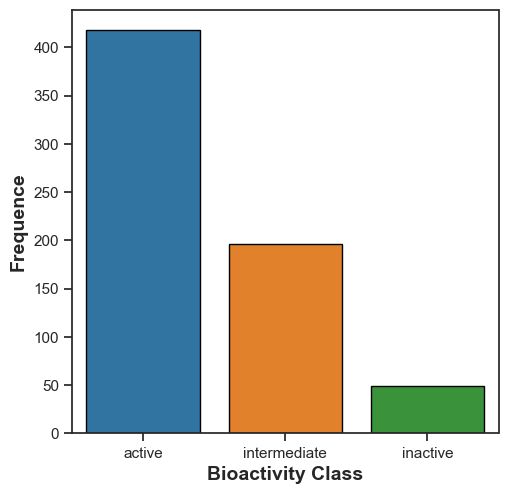

In [127]:
plt.figure(figsize = (5.5, 5.5))
sns.countplot(x="class", data = models, edgecolor = "black", hue="class", palette=["#1f77b4", "#ff7f0e", "#2ca02c"])
plt.xlabel("Bioactivity Class", fontsize = 14, fontweight = "bold")
plt.ylabel("Frequence", fontsize = 14, fontweight = "bold")
plt.savefig("class_freq.pdf")

##### Scatter plot of molecular weights - LogP

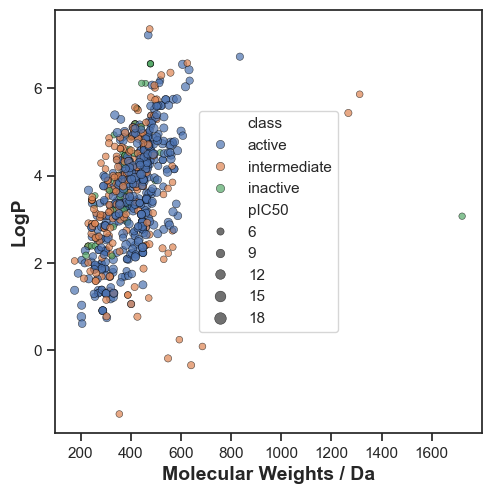

In [128]:
plt.figure(figsize = (5.5, 5.5))
sns.scatterplot(x="MW", y="LogP", data=models, hue="class", size="pIC50", edgecolor="black", alpha=0.7)
plt.xlabel("Molecular Weights / Da", fontsize=14, fontweight="bold")
plt.ylabel("LogP", fontsize=14, fontweight= "bold")
plt.savefig("MV_LogP.pdf")

##### Box plot class - pIC50, MW, LogP, NHDonnors, NHAcceptors

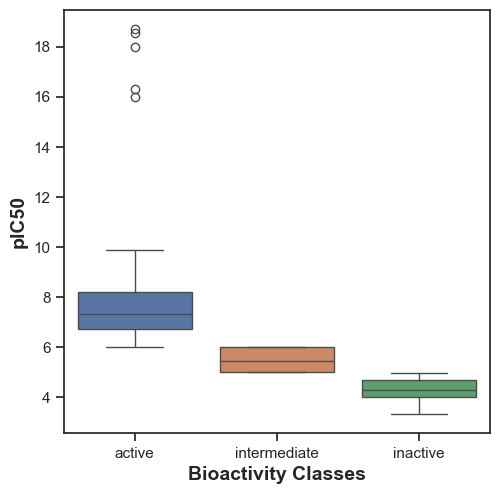

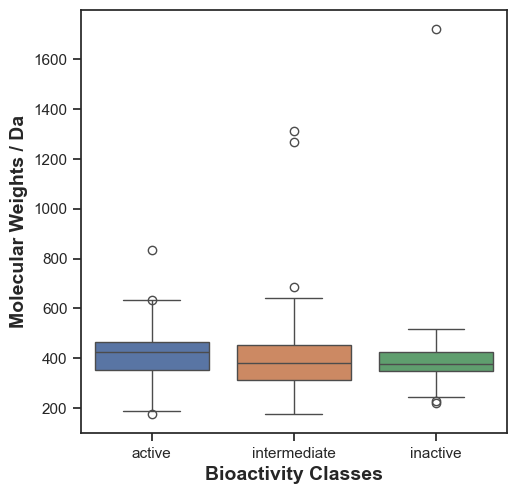

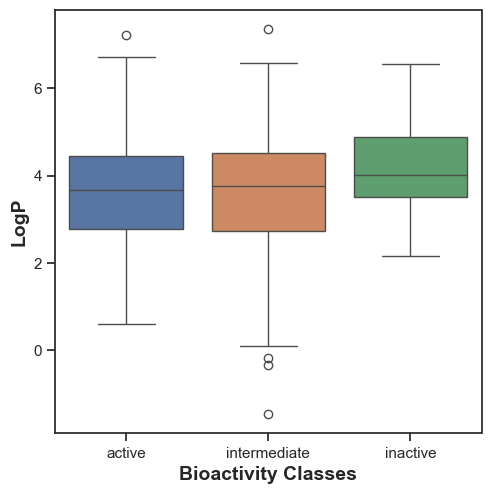

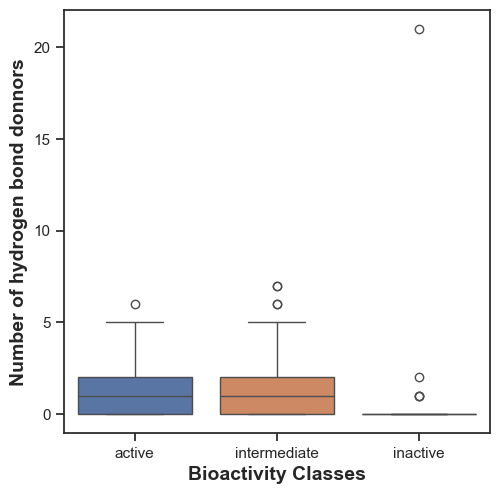

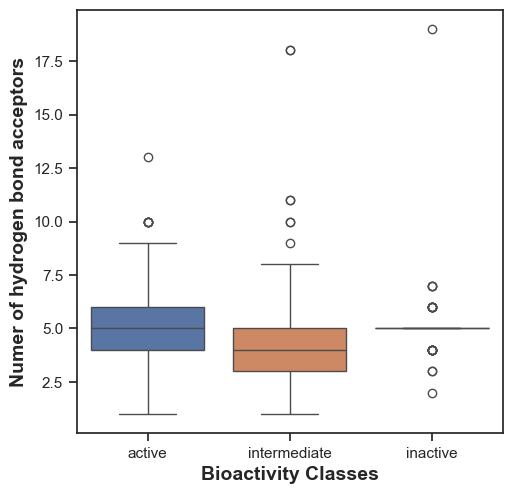

In [129]:
descriptors = {
    "pIC50": "pIC50", 
    "MW":"Molecular Weights / Da", 
    "LogP":"LogP", 
    "NHDonnors":"Number of hydrogen bond donnors",
    "NHAcceptors":"Numer of hydrogen bond acceptors"
    }
for key, value in descriptors.items():
    plt.figure(figsize=(5.5,5.5))
    sns.boxplot(x="class", y= key, data=models, hue="class")
    plt.xlabel("Bioactivity Classes", fontsize=14, fontweight="bold")
    plt.ylabel(value, fontsize=14, fontweight="bold")
    plt.savefig(f"class_{key}.pdf")

##### Statistical Analysis : Mann-Whitney U Test

- To determine if there is a statistically significant difference between two independent samples or groups

- often used as an alternative to the t-test when the data are not normally distributed or when dealing with small sample sizes

link: https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/

In [130]:
def mann_whitney_u_test(dataframe, parameter:str, catagory:str, group1:str, group2:str, alpha:float):
    # parameter: name of figures to compare
    # catagory: name of catagory
    # group1, group2 = 2 different entries of the catagory
    # alpha: costume alpha value

    from scipy.stats import mannwhitneyu

    selection = [parameter, catagory]
    df = dataframe[selection]
    group1 = df[df[catagory] == group1]
    group1 = group1[parameter]
    group2 = df[df[catagory] == group2]
    group2 = group2[parameter]

    stats, p = mannwhitneyu(group1, group2)

    #interpret
    if p > alpha:
        interpretation = "Fail to reject H0 (same distribution)"
    else:
        interpretation = "Reject H0 (different distribution)"
    
    results = pd.DataFrame({
        "parameter":parameter,
        "statistics":stats,
        "α":alpha,
        "p":p,
        "interpretation":interpretation}, index=[0])
    
    return results

In [131]:
parameters = ["pIC50", "MW", "LogP","NHDonnors","NHAcceptors"]
df_mwu = pd.DataFrame()

for parameter in parameters:
    new_row = mann_whitney_u_test(models,parameter, "class", "active", "inactive", 0.05)
    df_mwu = pd.concat([df_mwu, new_row],ignore_index=True)   

df_mwu

,parameter,statistics,α,p,interpretation
0,pIC50,20482.00,0.05,0.00,Reject H0 (different distribution)
1,MW,12572.00,0.05,0.01,Reject H0 (different distribution)
2,LogP,7583.00,0.05,0.00,Reject H0 (different distribution)
3,NHDonnors,15995.50,0.05,0.00,Reject H0 (different distribution)
4,NHAcceptors,10197.00,0.05,0.96,Fail to reject H0 (same distribution)


## Dataset Preparation

In [132]:
import pandas as pd

models = pd.read_csv("processed_5HT1A_pIC50_Lipinski.csv")

#### PubChem Fingerprints

- binary representation of a molecule
- 881-bit structural key
- one bit / one molecular fragment: present -- 1, absent -- 0

Calculate PubChem fingerprints using PaDEL descriptors

PaDEL: a soltware tool to calculate different descriptors and fingerprints

$ pip install padelpy

In [133]:
# write smiles into .smi file
# .smi is the required file format for padel_descriptors
from padelpy import padeldescriptor
ls_smiles = models["canonical_smiles"].tolist()
with open("molecules.smi","w") as f:
    for smile in ls_smiles:
        f.write(smile + "\n")

padeldescriptor(mol_dir="molecules.smi", d_file="padel_descriptors.csv", fingerprints=True)

In [134]:
df_padel = pd.read_csv("padel_descriptors.csv")
df_fg = pd.concat([models,df_padel], axis=1)
df_fg.to_csv("pubchemfg_5HT1A.csv", index=False)
df_fg

,molecule_chembl_id,canonical_smiles,pIC50,class,MW,LogP,NHDonnors,NHAcceptors,Name,PubchemFP0,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL300209,CN(C)CCc1c[nH]c2ccc(Cc3nnn[nH]3)cc12,7.20,active,270.34,1.38,2,4,AUTOGEN_molecules_1,1,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL54265,CN(C)CCc1c[nH]c2ccc(-n3cncn3)cc12,7.60,active,255.32,1.85,1,4,AUTOGEN_molecules_2,1,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL53764,Cc1nccn1-c1ccc2[nH]cc(CCN(C)C)c2c1,7.20,active,268.36,2.77,1,3,AUTOGEN_molecules_3,1,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL299213,CCn1nnc(Cc2ccc3[nH]cc(CCN(C)C)c3c2)n1,6.30,active,298.39,1.87,1,5,AUTOGEN_molecules_4,1,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL53128,CN(C)CCc1c[nH]c2ccc(Cc3nnnn3C)cc12,6.70,active,284.37,1.39,1,5,AUTOGEN_molecules_5,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,CHEMBL4864918,N#Cc1ccc2[nH]cc(CCCCN3CCN(c4ccc(-n5ccc6occc6c5...,9.85,active,491.60,5.08,1,6,AUTOGEN_molecules_659,1,...,0,0,0,0,0,0,0,0,0,0
659,CHEMBL1800685,O=C(O)c1cc(-c2ccc(C3CCNCC3)cc2)c2ccc(-c3ccc(C(...,5.15,intermediate,475.51,7.36,2,2,AUTOGEN_molecules_660,1,...,0,0,0,0,0,0,0,0,0,0
660,CHEMBL5092058,Cc1cn([C@H](C)CC#N)c(=O)c2cc(Cn3nc(C(F)F)cc3Cl...,5.00,intermediate,380.79,3.11,0,7,AUTOGEN_molecules_661,1,...,0,0,0,0,0,0,0,0,0,0
661,CHEMBL304426,CCCN(CCC)C1CCc2ccc3[nH]cc(C=O)c3c2C1,8.92,active,298.43,3.96,1,2,AUTOGEN_molecules_662,1,...,0,0,0,0,0,0,0,0,0,0


#### Prepare X and Y Matrix

In [135]:
df_x = df_padel.drop(columns=["Name"])
df_x.to_csv("x_dataset_5HT1A.csv", index=False)
df_x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
659,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
660,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
661,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [136]:
df_y = models["pIC50"]
df_y.to_csv("y_dataset_5HT1A.csv", index=False)

## Compare multiple models

$ pip install lazypredict

In [137]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

In [138]:
X_ori = pd.read_csv("x_dataset_5HT1A.csv")
Y = pd.read_csv("y_dataset_5HT1A.csv")

print(X_ori.shape,Y.shape)

(663, 881) (663, 1)


##### Feature Selection
- improve the accuracy of the QSAR model and to avoid overfitting


In this projedct:

low vairance features : variance < 0.1

reference: link https://www.excli.de/index.php/excli/article/view/6356

In [139]:
# Remove low-variance features

from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=.1)
X = selection.fit_transform(X_ori)

selected_features = X_ori.columns[selection.get_support()].tolist()

X.shape

(663, 228)

##### Split data 80/20

In [140]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

##### Compare ML Algorithms

compare performances of 42 models

In [141]:
lReg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = lReg.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:09<00:00,  4.53it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002201 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 684
[LightGBM] [Info] Number of data points in the train set: 530, number of used features: 228
[LightGBM] [Info] Start training from score 6.739235
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [142]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,18427333265892521444519782250582817626854426501...,-1340169692064910674445141361078110986025328219...,19075778223386580925760222963199815712768.00,0.03
RANSACRegressor,12310905220239571181109248.00,-8953385614719687350812672.00,4930557335109.76,1.28
LinearRegression,12239814436804147709739008.00,-8901683226766652196519936.00,4916300679341.38,0.03
TransformedTargetRegressor,12239814436804147709739008.00,-8901683226766652196519936.00,4916300679341.38,0.03
KernelRidge,24.20,-15.88,6.77,0.01
GaussianProcessRegressor,20.99,-13.54,6.28,0.04
ExtraTreeRegressor,2.51,-0.09,1.72,0.01
ExtraTreesRegressor,2.45,-0.05,1.69,0.61
Ridge,2.40,-0.02,1.66,0.01


#### Visualization of model performance

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns

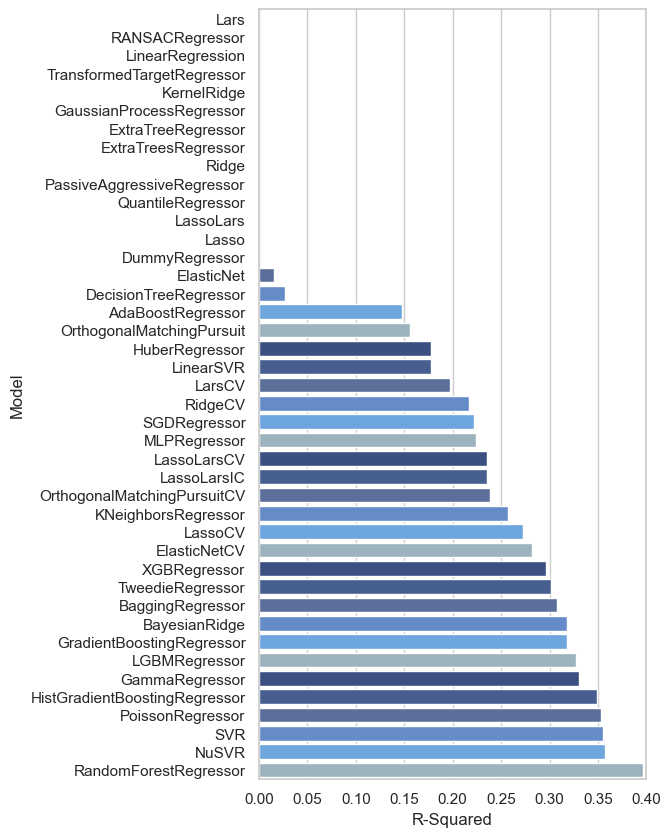

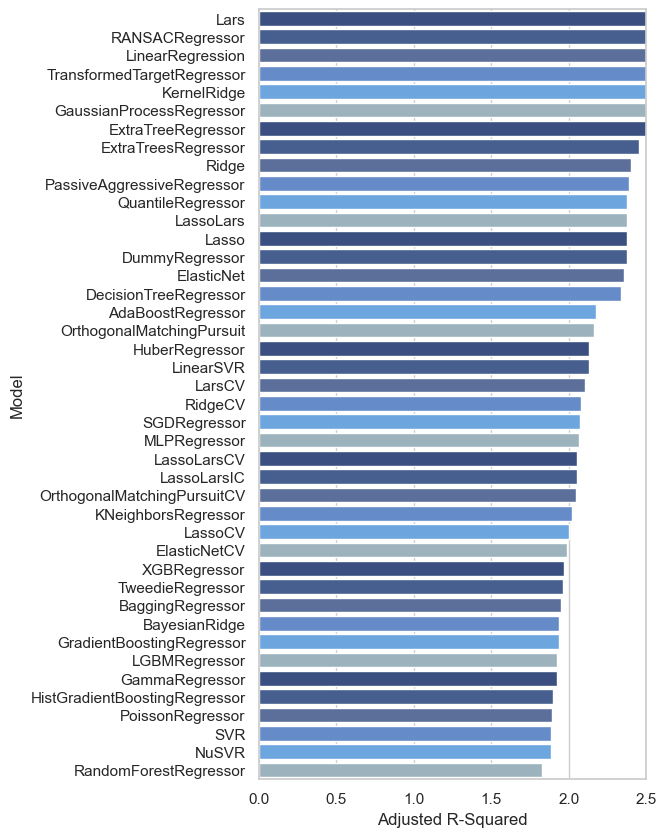

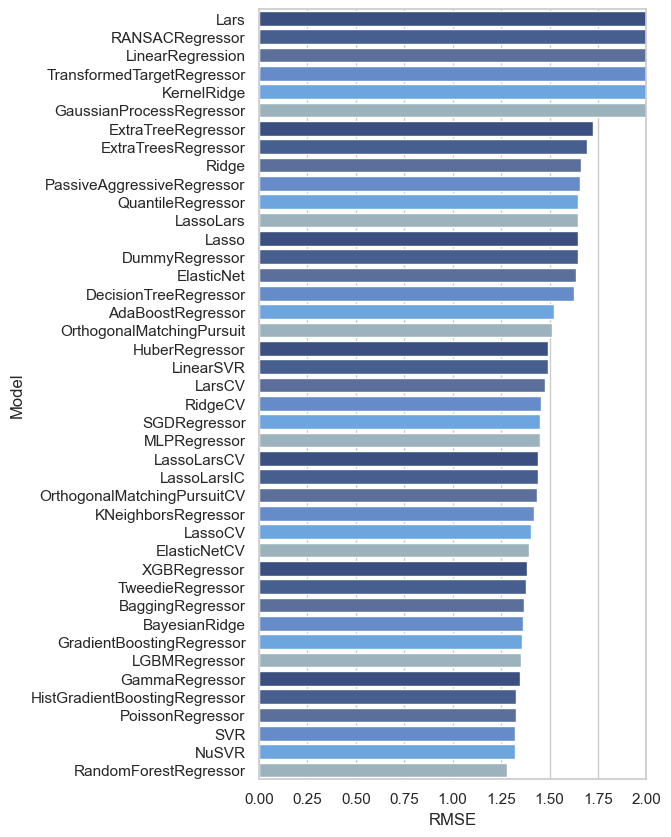

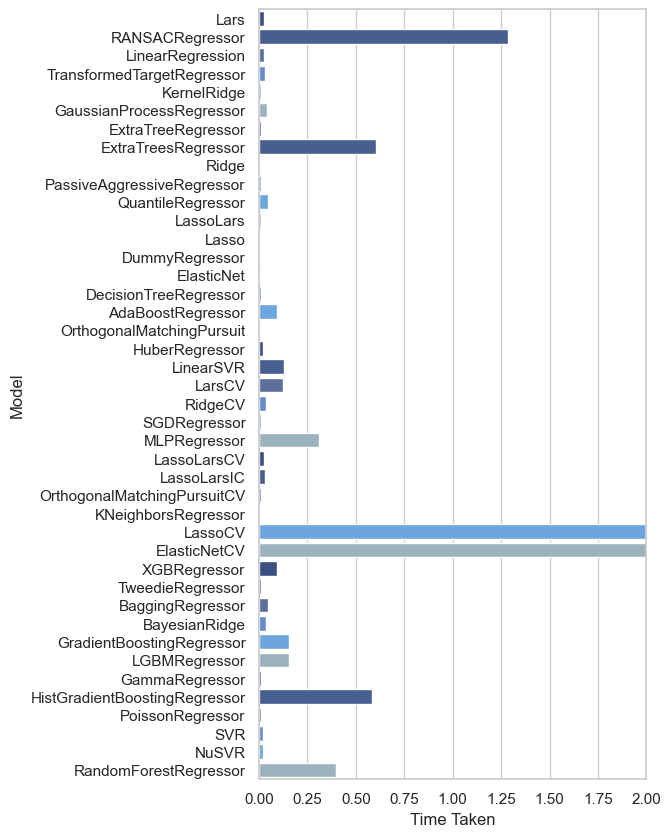

In [144]:
def performance_graph(models, parameter:str, xlim:float):
    plt.figure(figsize=(5,10))
    sns.set_theme(style="whitegrid")
    sns.barplot(y=models.index, x=parameter, data=models, palette = ["#2f4b8c", "#3a5b9b", "#516ba6", "#5487d9", "#5aa6f2", "#97b5c2"]).set(xlim=(0,xlim))

performance_graph(models, "R-Squared", 0.4)
performance_graph(models, "Adjusted R-Squared", 2.5)
performance_graph(models, "RMSE", 2)
performance_graph(models, "Time Taken", 2)

In [145]:
best_models = models.sort_values(by=['R-Squared', 'Adjusted R-Squared', 'RMSE', 'Time Taken'], 
                                   ascending=[False, False, True, True])
best_models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
RandomForestRegressor,1.83,0.40,1.28,0.40
NuSVR,1.88,0.36,1.32,0.02
SVR,1.89,0.36,1.32,0.02
PoissonRegressor,1.89,0.35,1.33,0.01
HistGradientBoostingRegressor,1.90,0.35,1.33,0.59
GammaRegressor,1.92,0.33,1.35,0.01
LGBMRegressor,1.92,0.33,1.35,0.15
GradientBoostingRegressor,1.94,0.32,1.36,0.16
BayesianRidge,1.94,0.32,1.36,0.04


In [146]:
# Train a Random Forest Regressor
import numpy as np
np.random.seed(100)
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(X_train, Y_train)
r_sqr = rfr.score(X_test, Y_test)
print(f"R**2 = {r_sqr}")

Y_pred = rfr.predict(X_test)

R**2 = 0.431302496495488


<function matplotlib.pyplot.show(close=None, block=None)>

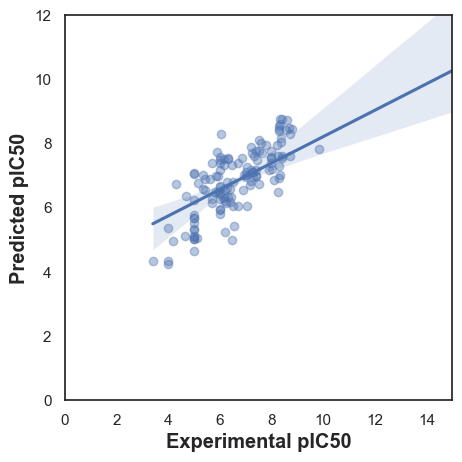

In [147]:
# visualize 
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 15)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show

In [148]:
# Retrieve important features

importances = rfr.feature_importances_
X_selected = pd.DataFrame(X, columns=selected_features)
feature_importance = pd.Series(importances, index=selected_features).sort_values(ascending=False)

top_features = feature_importance.head(30)
top_features

PubchemFP404   0.10
PubchemFP338   0.04
PubchemFP697   0.03
PubchemFP682   0.03
PubchemFP647   0.02
PubchemFP180   0.02
PubchemFP485   0.02
PubchemFP397   0.02
PubchemFP192   0.02
PubchemFP381   0.01
PubchemFP199   0.01
PubchemFP16    0.01
PubchemFP692   0.01
PubchemFP646   0.01
PubchemFP261   0.01
PubchemFP638   0.01
PubchemFP704   0.01
PubchemFP185   0.01
PubchemFP188   0.01
PubchemFP449   0.01
PubchemFP712   0.01
PubchemFP374   0.01
PubchemFP145   0.01
PubchemFP19    0.01
PubchemFP393   0.01
PubchemFP542   0.01
PubchemFP508   0.01
PubchemFP186   0.01
PubchemFP716   0.01
PubchemFP645   0.01
dtype: float64

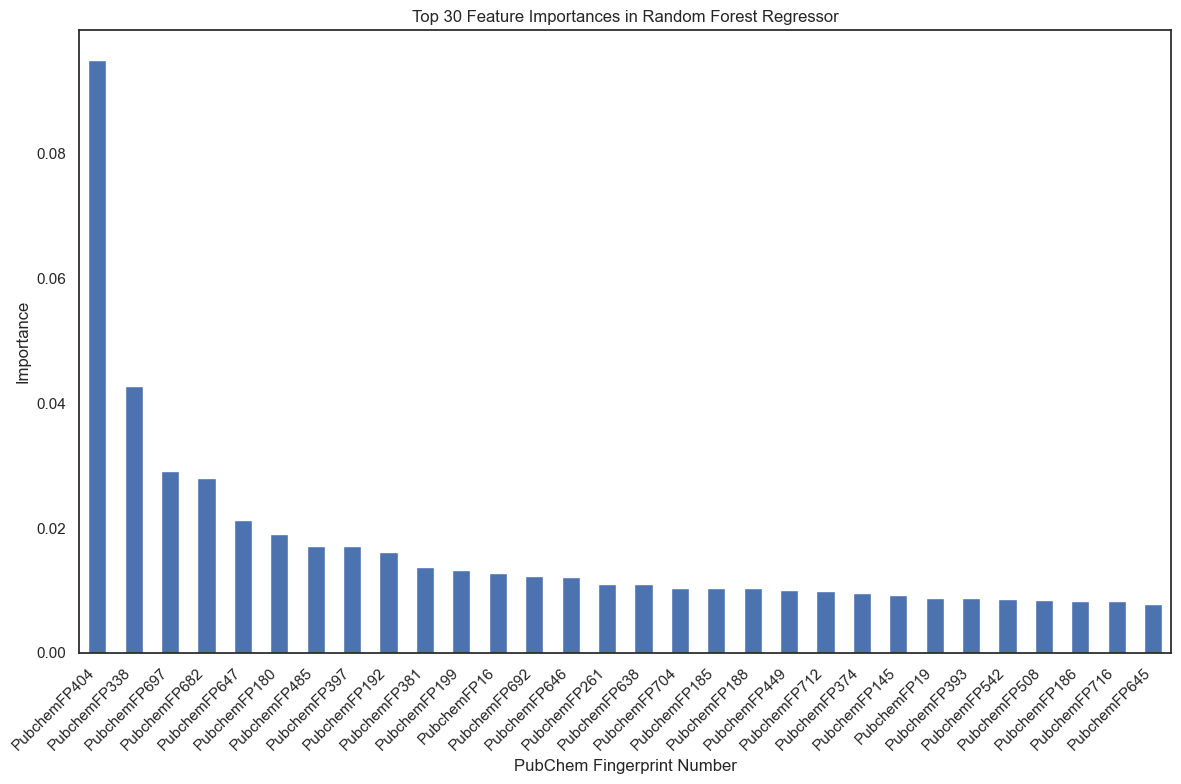

In [149]:
# Visualize important features
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
top_features.plot(kind='bar')
plt.title("Top 30 Feature Importances in Random Forest Regressor")
plt.xlabel("PubChem Fingerprint Number")
plt.ylabel("Importance")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Important Chemical Features:

bit structures

link: https://github.com/cdk/orchem/blob/master/doc/pubchem_fingerprints.txt


Top 5 Features

- 404 N(:C)(:C)(:C) [one nitrogen atom bonded to three aromatic carbon atoms]

- 338 C(~C)(~C)(~H)(~N) [one central carbon atom connected to: two other unspecified carbon atoms, one hydrogen and one nitrogen]

- 697 C-C-C-C-C-C(C)-C [a branched alkane with seven carbon atoms]

- 682 O-C-C-C-C-N [a linear chain structure consisting of an oxygen atom connected to a carbon chain that ends with a nitrogen atom]
   
- 647 O=C-N-C-N [a carbonyl group (C=O) bonded to two nitrogen atoms via carbon atoms]

